<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%202.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.3.1 Joint probability distributions**

***Joint Probability Distribution for Two Discrete Random Variables***

The joint probability distribution for two discrete random variables X and Y is the probability that X takes a specific value $x$ and Y takes a specific value $y$ at the same time. It is denoted as $p(x,y)$.

**Example 1: Joint PMF for Two Discrete Random Variables**

Let's define two discrete random variables X and Y, representing two dice rolls, each having values {1, 2, 3, 4, 5, 6}. We will calculate the joint probability distribution of X and Y.

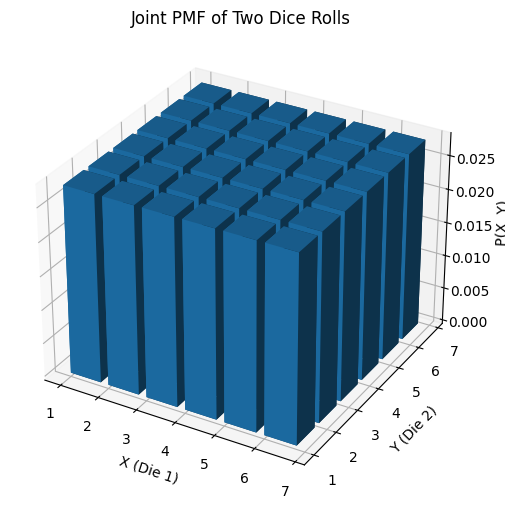

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the possible values for X and Y (two dice rolls)
X_values = np.arange(1, 7)
Y_values = np.arange(1, 7)

# Calculate the joint probability for each pair (X, Y) assuming independent dice
joint_prob = np.ones((6, 6)) / 36  # Each pair has a probability of 1/36

# Plot the joint PMF
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(X_values, Y_values)
ax.bar3d(X.flatten(), Y.flatten(), np.zeros_like(joint_prob.flatten()),
         0.8, 0.8, joint_prob.flatten(), shade=True)
ax.set_xlabel('X (Die 1)')
ax.set_ylabel('Y (Die 2)')
ax.set_zlabel('P(X, Y)')
ax.set_title('Joint PMF of Two Dice Rolls')
plt.show()

**Explanation:**

*   We assume two independent dice rolls. Each pair of values $(x,y)$ has the same probability of $\frac{1}{36}$.
*   The `joint_prob` array contains the joint probabilities for all possible pairs of outcomes for the dice rolls.

***Marginal Probability Distribution***

The *marginal probability distribution* of a subset of random variables (e.g., just X or just Y) is obtained by summing the joint probabilities over the other variable. The marginal probability distribution of X is:

\
\begin{aligned}
p_X(x)= ∑_yp(x,y)
\end{aligned}

\
**Example 2: Marginal Probability Distribution**

We calculate the marginal probability distribution for X from the joint PMF of two dice.

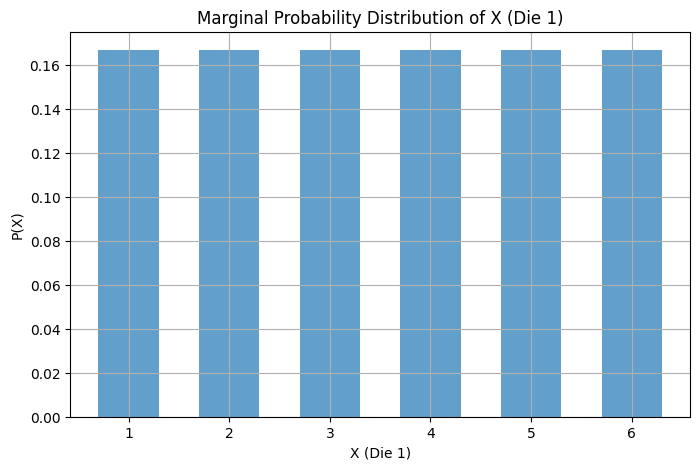

In [2]:
# Calculate the marginal probability of X
marginal_prob_X = np.sum(joint_prob, axis=1)  # Sum over Y

# Plot the marginal distribution of X
plt.figure(figsize=(8, 5))
plt.bar(X_values, marginal_prob_X, width=0.6, alpha=0.7, label='P(X)')
plt.title('Marginal Probability Distribution of X (Die 1)')
plt.xlabel('X (Die 1)')
plt.ylabel('P(X)')
plt.grid()
plt.show()

**Explanation:**

*   The marginal probability of X is computed by summing over all possible values of Y.

***Joint Probability Distribution for Two Continuous Random Variables***

The *joint probability density function* (*pdf*) for two continuous random variables X and Y gives the probability that $X$ and $Y$ fall within a certain range. The joint probability for a region $A$ is obtained by integrating the joint pdf over that region.

**Example 3: Joint PDF for Two Continuous Random Variables**

Let's assume $X$ and $Y$ are independent normal variables with mean 0 and standard deviation 1. The joint pdf is the product of the individual normal pdfs.

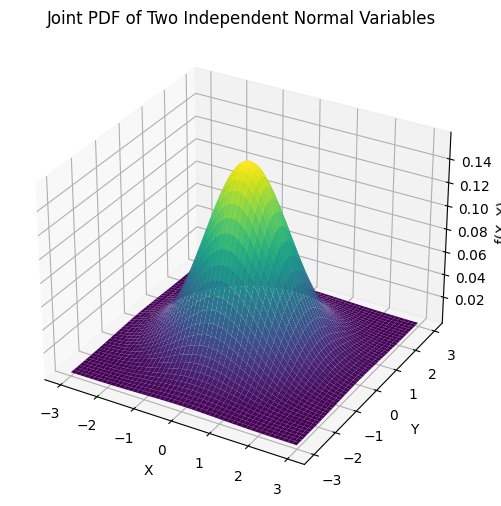

In [3]:
from scipy.stats import multivariate_normal

# Define the mean and covariance matrix for two independent normal variables
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # Independent variables, no covariance

# Create the multivariate normal distribution
rv = multivariate_normal(mean, cov)

# Generate grid for X and Y
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))

# Evaluate the joint PDF
pdf = rv.pdf(pos)

# Plot the joint PDF
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, pdf, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X, Y)')
ax.set_title('Joint PDF of Two Independent Normal Variables')
plt.show()

**Explanation:**

*   We use the multivariate_normal distribution from scipy.stats to define a bivariate normal distribution with independent components $X$ and $Y$.
*   The joint pdf is plotted as a surface in 3D.

***Independent Random Variables***

Two random variables $X$ and $Y$ are independent if the joint pdf or pmf factorizes into the product of their individual marginal pdfs or pmfs:

\
\begin{aligned}
f(x,y)=f_X(x)⋅f_Y(y)
\end{aligned}

\
**Example 4: Verifying Independence of Two Exponential Variables**

We will compute the joint pdf of two independent exponential random variables and verify that the joint pdf is the product of the marginal pdfs.

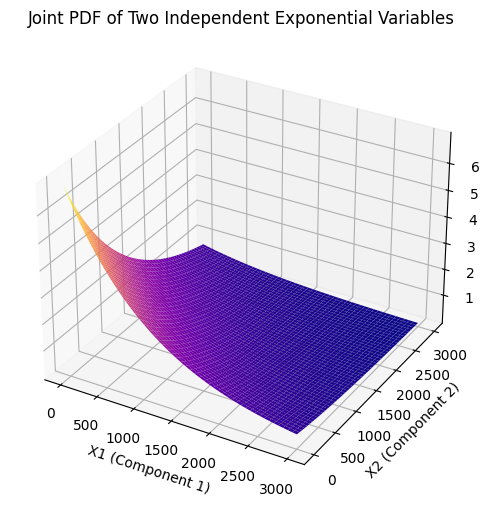

In [4]:
from scipy.stats import expon

# Define the exponential distributions with different rates
lambda_1, lambda_2 = 1/1100, 1/1300

# Joint PDF of two independent exponential random variables
def joint_exponential_pdf(x1, x2, lambda_1, lambda_2):
    return (lambda_1 * np.exp(-lambda_1 * x1)) * (lambda_2 * np.exp(-lambda_2 * x2))

# Generate grid for x1 and x2
x1_values = np.linspace(0, 3000, 1000)
x2_values = np.linspace(0, 3000, 1000)
X1, X2 = np.meshgrid(x1_values, x2_values)
joint_pdf_values = joint_exponential_pdf(X1, X2, lambda_1, lambda_2)

# Plot the joint PDF
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, joint_pdf_values, cmap='plasma', edgecolor='none')
ax.set_xlabel('X1 (Component 1)')
ax.set_ylabel('X2 (Component 2)')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Joint PDF of Two Independent Exponential Variables')
plt.show()

**Explanation:**

*   We define the joint pdf for two independent exponential random variables with different rate parameters.
*   The joint pdf is the product of the two individual exponential pdfs.

# **2.3.2. Correlation and dependence**

***Covariance and Correlation for Two Discrete Random Variables***

**Example 1: Joint PMF of Two Discrete Random Variables**

Let's consider two discrete random variables $X$ and $Y$ representing the outcomes of two independent six-sided dice rolls. We will compute their covariance and correlation.

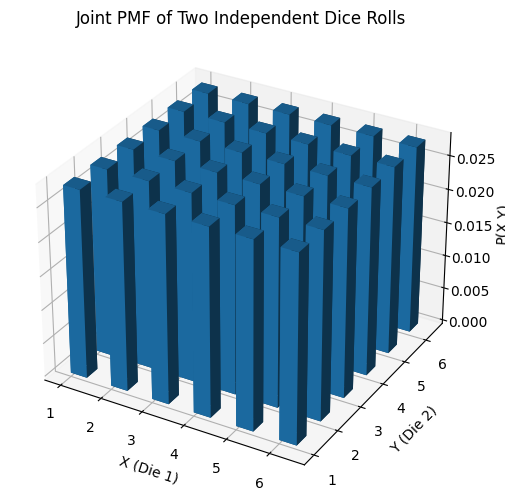

Expected Value E(X): 3.5
Expected Value E(Y): 3.5
Covariance Cov(X,Y): 0.0
Correlation Coefficient rho(X,Y): 0.00


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define possible outcomes for X and Y (two dice rolls)
X_values = np.arange(1, 7)
Y_values = np.arange(1, 7)

# Assuming the dice are independent, the joint PMF is uniform
joint_pmf = np.ones((6, 6)) / 36  # Each (x, y) has probability 1/36

# Create a meshgrid for plotting
X, Y = np.meshgrid(X_values, Y_values)

# Plot the joint PMF
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.flatten(), Y.flatten(), np.zeros(36), 0.4, 0.4, joint_pmf.flatten(), shade=True)
ax.set_xlabel('X (Die 1)')
ax.set_ylabel('Y (Die 2)')
ax.set_zlabel('P(X,Y)')
ax.set_title('Joint PMF of Two Independent Dice Rolls')
plt.show()

# Calculate marginal PMFs
p_X = np.sum(joint_pmf, axis=1)
p_Y = np.sum(joint_pmf, axis=0)

# Calculate expected values
E_X = np.sum(X_values * p_X)
E_Y = np.sum(Y_values * p_Y)

# Calculate covariance
E_XY = np.sum(X_values[:, None] * Y_values * joint_pmf)
cov_XY = E_XY - E_X * E_Y

# Calculate standard deviations
sigma_X = np.sqrt(np.sum((X_values - E_X)**2 * p_X))
sigma_Y = np.sqrt(np.sum((Y_values - E_Y)**2 * p_Y))

# Calculate correlation coefficient
rho_XY = cov_XY / (sigma_X * sigma_Y)

print(f"Expected Value E(X): {E_X}")
print(f"Expected Value E(Y): {E_Y}")
print(f"Covariance Cov(X,Y): {cov_XY}")
print(f"Correlation Coefficient rho(X,Y): {rho_XY:.2f}")

**Explanation:**

1.   *Joint PMF*: Since the dice are independent, each pair $(x,y)$ has an equal probability of $\frac{1}{36}$.
2.   *Marginal PMFs*: Summing the joint PMF over one variable gives the marginal PMF of the other.
3.   *Expected Values*: Calculated as the sum of each value multiplied by its marginal probability.
4.   *Covariance*: Measures the joint variability. For independent variables, covariance should be zero.
5.   *Standard Deviations*: Square roots of the variances.
6.   *Correlation Coefficient*: For independent variables, it should be zero.

**Interpretation:**

*   The covariance and correlation coefficient are both zero, indicating that $X$ and $Y$ are independent.

***Sample Covariance and Sample Correlation Coefficient***

**Example 2: Computing Sample Covariance and Correlation**

Consider a dataset of paired observations. We will compute the sample covariance and sample correlation coefficient.

In [6]:
import numpy as np

# Sample data: paired observations
# Example: Heights (in inches) and Weights (in pounds) of 10 individuals
X = np.array([65, 67, 70, 72, 75, 68, 66, 73, 69, 71])
Y = np.array([150, 160, 165, 170, 180, 155, 145, 175, 158, 168])

# Calculate sample means
mean_X = np.mean(X)
mean_Y = np.mean(Y)

# Calculate sample covariance
cov_XY = np.sum((X - mean_X) * (Y - mean_Y)) / (len(X) - 1)

# Calculate sample standard deviations
sigma_X = np.std(X, ddof=1)
sigma_Y = np.std(Y, ddof=1)

# Calculate sample correlation coefficient
r_xy = cov_XY / (sigma_X * sigma_Y)

print(f"Sample Mean of X: {mean_X}")
print(f"Sample Mean of Y: {mean_Y}")
print(f"Sample Covariance Cov(X,Y): {cov_XY:.2f}")
print(f"Sample Correlation Coefficient r_xy: {r_xy:.2f}")

Sample Mean of X: 69.6
Sample Mean of Y: 162.6
Sample Covariance Cov(X,Y): 33.93
Sample Correlation Coefficient r_xy: 0.96


**Explanation:**

1.   *Sample Data*: Heights and weights of 10 individuals.
2.   *Sample Means*: Average of X and Y.
3.   *Sample Covariance*: Measures how X and Y vary together.
4.   *Sample Standard Deviations*: Measure the spread of X and Y.
5.   *Sample Correlation Coefficient*: Standardized measure of covariance.

**Interpretation:**

A high positive correlation coefficient $(r_{xy}=0.96)$ indicates a strong positive linear relationship between heights and weights in the sample data.

***Visualizing Correlation with Synthetic Data***

**Example 3: Correlation Visualization**

We will generate synthetic data with a known correlation and visualize it.

Covariance Cov(X,Y): 17.29
Correlation Coefficient rho(X,Y): 0.99


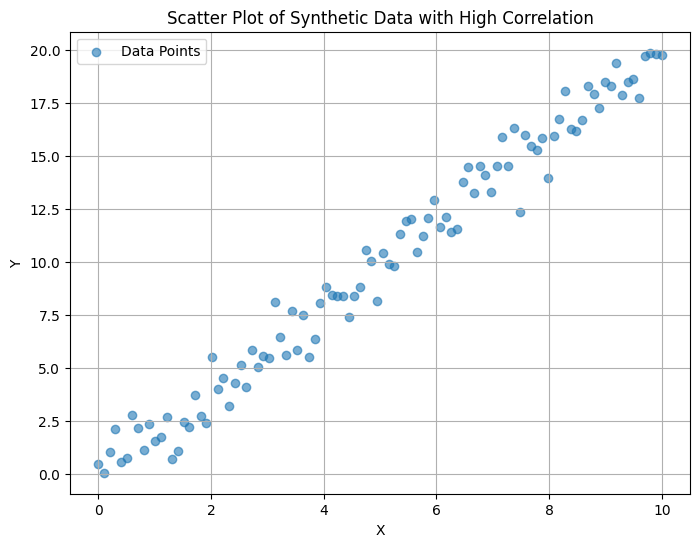

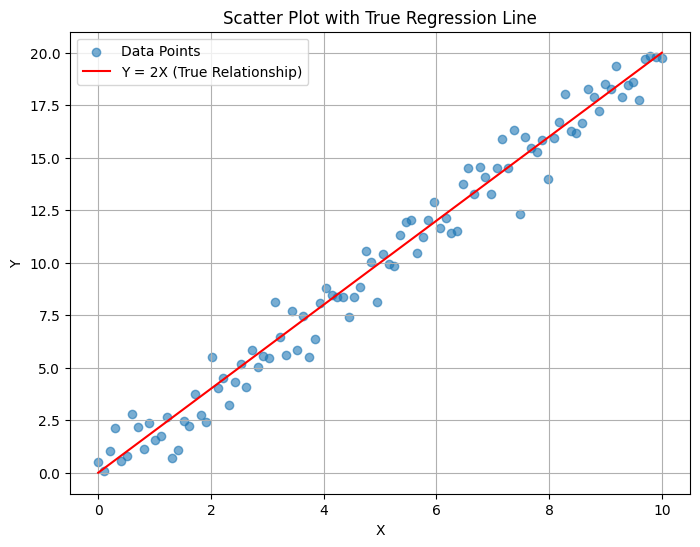

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
# Let Y = 2X + noise, where noise ~ N(0, 1)
X = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, 100)
Y = 2 * X + noise

# Calculate covariance and correlation
cov_XY = np.cov(X, Y)[0, 1]
sigma_X = np.std(X, ddof=1)
sigma_Y = np.std(Y, ddof=1)
rho_XY = cov_XY / (sigma_X * sigma_Y)

print(f"Covariance Cov(X,Y): {cov_XY:.2f}")
print(f"Correlation Coefficient rho(X,Y): {rho_XY:.2f}")

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.6, label='Data Points')
plt.title('Scatter Plot of Synthetic Data with High Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.6, label='Data Points')
plt.plot(X, 2*X, color='red', label='Y = 2X (True Relationship)')
plt.title('Scatter Plot with True Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1.   *Synthetic Data Generation*: $Y$ is linearly dependent on $X$ with some added noise.
2.   *Covariance and Correlation*: Calculated to quantify the relationship.
3.   *Scatter Plot*: Visualizes the strong linear relationship.
4.   *Regression Line*: Plots the true underlying relationship.

**Interpretation:**

*   The high correlation coefficient $(ρ_{X,Y}=0.99)$ indicates a nearly perfect positive linear relationship between $X$ and $Y$.
*   The scatter plot shows data points closely aligned along the regression line $Y=2X$.

***Independent vs. Dependent Random Variables***

**Example 4: Comparing Independent and Dependent Variables**

We will create two sets of random variables: one set where $X$ and $Y$ are independent, and another set where $Y$ depends on $X$. We will compute and compare their correlation coefficients.

Independent Variables Correlation Coefficient rho: -0.04


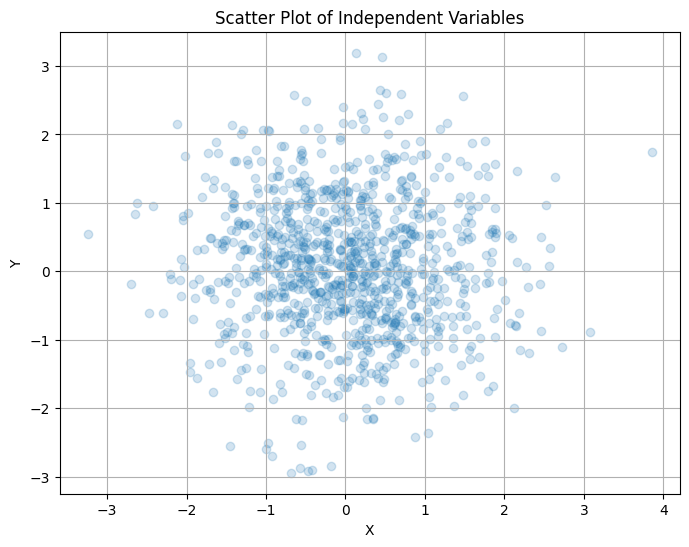

Dependent Variables Correlation Coefficient rho: 0.95


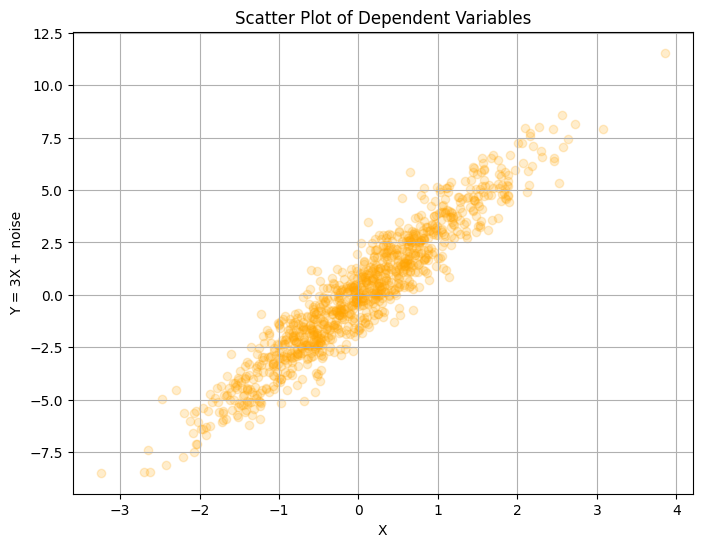

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate independent random variables
X_indep = np.random.normal(0, 1, 1000)
Y_indep = np.random.normal(0, 1, 1000)

# Calculate correlation for independent variables
cov_indep = np.cov(X_indep, Y_indep)[0, 1]
rho_indep = cov_indep / (np.std(X_indep, ddof=1) * np.std(Y_indep, ddof=1))

print(f"Independent Variables Correlation Coefficient rho: {rho_indep:.2f}")

# Plot independent variables
plt.figure(figsize=(8, 6))
plt.scatter(X_indep, Y_indep, alpha=0.2)
plt.title('Scatter Plot of Independent Variables')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# Generate dependent random variables (Y = 3X + noise)
noise_dep = np.random.normal(0, 1, 1000)
Y_dep = 3 * X_indep + noise_dep

# Calculate correlation for dependent variables
cov_dep = np.cov(X_indep, Y_dep)[0, 1]
rho_dep = cov_dep / (np.std(X_indep, ddof=1) * np.std(Y_dep, ddof=1))

print(f"Dependent Variables Correlation Coefficient rho: {rho_dep:.2f}")

# Plot dependent variables
plt.figure(figsize=(8, 6))
plt.scatter(X_indep, Y_dep, alpha=0.2, color='orange')
plt.title('Scatter Plot of Dependent Variables')
plt.xlabel('X')
plt.ylabel('Y = 3X + noise')
plt.grid(True)
plt.show()

**Explanation:**

1.   *Independent Variables*:
  *   Both $X$ and $Y$ are generated from a standard normal distribution independently.
  *   Expected correlation coefficient is approximately zero.

2.   *Dependent Variables*:
  *   $Y$ is generated as $Y=3X+noise$, introducing a linear dependency on $X$.
  *   Expected correlation coefficient is high (close to 1).

**Interpretation:**

*   *Independent Variables*: The correlation coefficient is near zero, indicating no linear relationship.
*   *Dependent Variables*: The correlation coefficient is close to 1, indicating a strong positive linear relationship.

# **2.3.3. Random samples**

***Generating and Verifying a Simple Random Sample***

**Example 1: Generating a Simple Random Sample and Verifying Its Properties**

A *simple random sample* consists of independent random variables that all have the same probability distribution. We will generate such a sample and verify these properties.

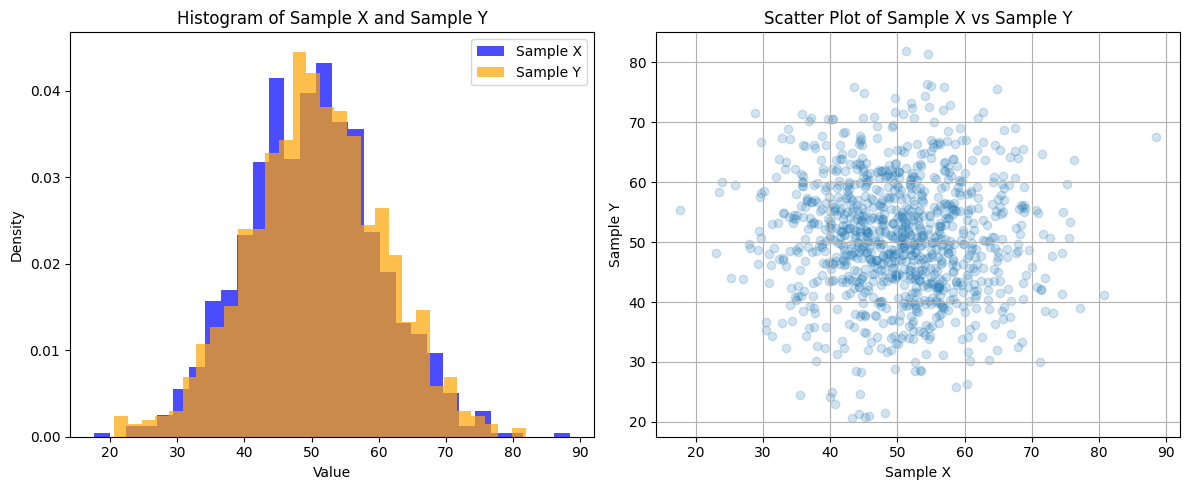

Sample Mean of X: 50.19
Sample Mean of Y: 50.71
Sample Standard Deviation of X: 9.79
Sample Standard Deviation of Y: 9.97
Sample Covariance Cov(X,Y): -3.95


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for the distributions
mu, sigma = 50, 10  # Mean and standard deviation for a normal distribution

# Generate a simple random sample of size n
n = 1000
sample_X = np.random.normal(mu, sigma, n)  # Random variable X ~ N(mu, sigma^2)
sample_Y = np.random.normal(mu, sigma, n)  # Random variable Y ~ N(mu, sigma^2)

# Verify that X and Y have the same distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sample_X, bins=30, alpha=0.7, label='Sample X', color='blue', density=True)
plt.hist(sample_Y, bins=30, alpha=0.7, label='Sample Y', color='orange', density=True)
plt.title('Histogram of Sample X and Sample Y')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Verify independence by plotting scatter plot
plt.subplot(1, 2, 2)
plt.scatter(sample_X, sample_Y, alpha=0.2)
plt.title('Scatter Plot of Sample X vs Sample Y')
plt.xlabel('Sample X')
plt.ylabel('Sample Y')
plt.grid(True)

plt.tight_layout()
plt.show()

# Check statistical properties
mean_X = np.mean(sample_X)
mean_Y = np.mean(sample_Y)
std_X = np.std(sample_X, ddof=1)
std_Y = np.std(sample_Y, ddof=1)
cov_XY = np.cov(sample_X, sample_Y)[0, 1]

print(f"Sample Mean of X: {mean_X:.2f}")
print(f"Sample Mean of Y: {mean_Y:.2f}")
print(f"Sample Standard Deviation of X: {std_X:.2f}")
print(f"Sample Standard Deviation of Y: {std_Y:.2f}")
print(f"Sample Covariance Cov(X,Y): {cov_XY:.2f}")

**Explanation:**

1.   *Generating Samples*:
  *   We generate two independent samples, `sample_X` and `sample_Y`, each drawn from a normal distribution with mean `mu` and standard deviation `sigma`.
  *   The `numpy.random.normal` function is used to generate these samples.

2.   *Verifying Identical Distribution*:
  *   Histograms of both samples are plotted to visually verify that they have the same distribution.
  *   Both histograms should overlap closely if the samples are identically distributed.

3.   *Verifying Independence*:
  *   A scatter plot of `sample_X` vs. `sample_Y` is created.
  *   If the variables are independent, there should be no discernible pattern or correlation in the scatter plot.

4.   *Statistical Properties*:
  *   Calculate and print the sample means, standard deviations, and covariance.
  *   For independent variables, the covariance should be close to zero.

**Interpretation:**

*   *Identical Distribution*: The histograms of `sample_X` and `sample_Y` overlap significantly, indicating that both samples come from the same distribution.
*   *Independence*: The scatter plot shows a random distribution of points with no apparent pattern, suggesting that `X` and `Y` are independent.
*   *Covariance*: The covariance is close to zero (`-3.95`), further indicating independence.

***Sample Mean Properties: Expectation and Variance***

**Example 2: Demonstrating Properties of the Sample Mean**

We will demonstrate that the expected value of the sample mean equals the population mean, and the variance of the sample mean equals the population variance divided by the sample size.

Sample Size n = 5:
  Sample Mean: E(X̄) ≈ 99.96 (Theoretical: 100)
  Sample Variance: Var(X̄) ≈ 45.28 (Theoretical: 45.00)

Sample Size n = 30:
  Sample Mean: E(X̄) ≈ 99.99 (Theoretical: 100)
  Sample Variance: Var(X̄) ≈ 7.47 (Theoretical: 7.50)

Sample Size n = 100:
  Sample Mean: E(X̄) ≈ 99.97 (Theoretical: 100)
  Sample Variance: Var(X̄) ≈ 2.26 (Theoretical: 2.25)

Sample Size n = 500:
  Sample Mean: E(X̄) ≈ 100.00 (Theoretical: 100)
  Sample Variance: Var(X̄) ≈ 0.44 (Theoretical: 0.45)

Sample Size n = 1000:
  Sample Mean: E(X̄) ≈ 100.00 (Theoretical: 100)
  Sample Variance: Var(X̄) ≈ 0.22 (Theoretical: 0.23)



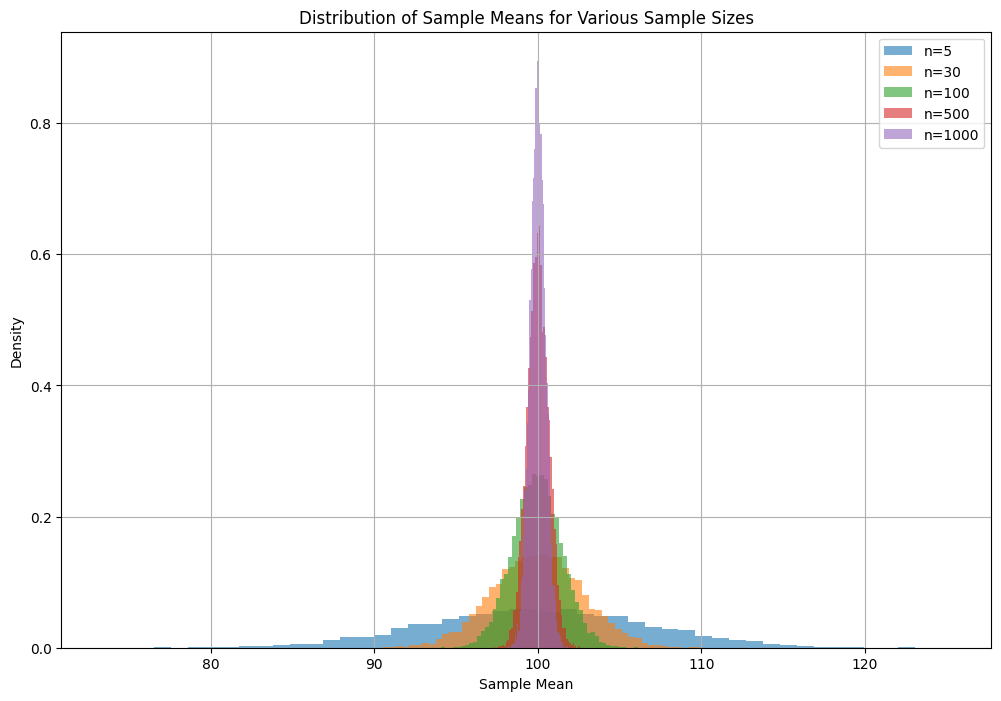

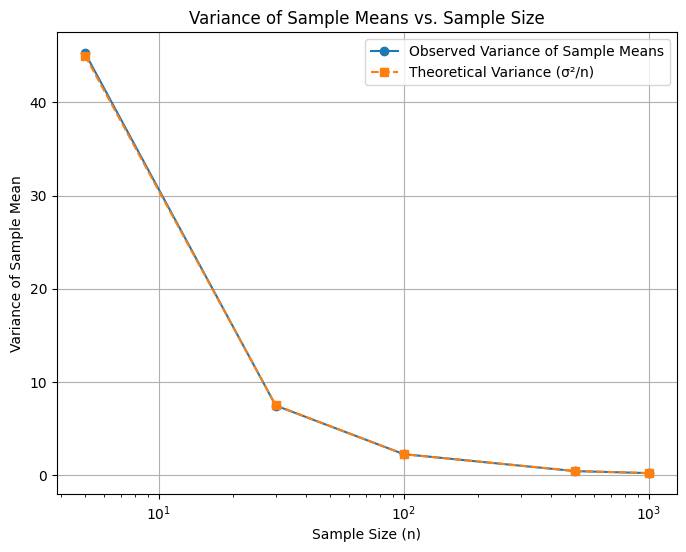

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Population parameters
mu = 100  # Population mean
sigma = 15  # Population standard deviation

# Sample sizes to investigate
sample_sizes = [5, 30, 100, 500, 1000]

# Number of simulations for each sample size
num_simulations = 10000

# Store results
means = []
variances = []

for n in sample_sizes:
    # Generate samples: each simulation is a sample of size n
    samples = np.random.normal(mu, sigma, (num_simulations, n))

    # Compute sample means
    sample_means = np.mean(samples, axis=1)
    means.append(sample_means)

    # Compute sample variances
    sample_variances = np.var(samples, axis=1, ddof=1)
    variances.append(sample_variances)

    # Theoretical expectations
    theoretical_mean = mu
    theoretical_variance = sigma**2 / n

    # Print results
    print(f"Sample Size n = {n}:")
    print(f"  Sample Mean: E(X̄) ≈ {np.mean(sample_means):.2f} (Theoretical: {theoretical_mean})")
    print(f"  Sample Variance: Var(X̄) ≈ {np.var(sample_means, ddof=1):.2f} (Theoretical: {theoretical_variance:.2f})\n")

# Plotting the distribution of sample means for different sample sizes
plt.figure(figsize=(12, 8))
for idx, n in enumerate(sample_sizes):
    plt.hist(means[idx], bins=50, alpha=0.6, label=f'n={n}', density=True)
plt.title('Distribution of Sample Means for Various Sample Sizes')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the variance of sample means vs sample size
sample_variances_mean = [np.var(m, ddof=1) for m in means]
theoretical_variances = [sigma**2 / n for n in sample_sizes]

plt.figure(figsize=(8, 6))
plt.plot(sample_sizes, sample_variances_mean, 'o-', label='Observed Variance of Sample Means')
plt.plot(sample_sizes, theoretical_variances, 's--', label='Theoretical Variance (σ²/n)')
plt.title('Variance of Sample Means vs. Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel('Variance of Sample Mean')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1.   *Population Parameters*:
  *   Defined population mean `mu` and standard deviation `sigma`.

2.   *Sample Sizes*:
  *   Investigate different sample sizes to observe how the properties of the sample mean change with `n`.

3.   *Simulations*:
  *   For each sample size `n`, perform `num_simulations` (10,000) simulations.
  *   In each simulation, generate a sample of size `n` from the normal distribution.
  *   Compute the sample mean and variance for each simulation.

4.   *Theoretical Expectations*:
  *   Theoretical mean of the sample mean is equal to the population mean (`mu`).
  *   Theoretical variance of the sample mean is `sigma² / n`.

5.   *Results*:
  *   Print the observed mean and variance of the sample means alongside theoretical values.
  *   Plot histograms of the sample means for different sample sizes to visualize convergence.
  *   Plot the observed variance of sample means against the theoretical variance to verify the relationship.

**Interpretation:**

*   *Expectation*:
  *   The observed sample means are very close to the theoretical mean (mu = 100) for all sample sizes.

*   *Variance*:
  *   The observed variances of the sample means closely match the theoretical variances (sigma² / n).
  *   As the sample size increases, the variance of the sample mean decreases, demonstrating that larger samples provide more precise estimates of the population mean.

*   *Histograms*:
  *   As the sample size increases, the distribution of the sample mean becomes more concentrated around the population mean.
  *   This illustrates the Law of Large Numbers, where larger samples yield estimates closer to the true population parameter.

*   *Variance Plot*:
  *   The observed variances of the sample means align closely with the theoretical variances, confirming the relationship $Var(\bar{X})=σ^2/n$.

***Central Limit Theorem Demonstration***

**Example 3: Demonstrating the Central Limit Theorem with a Uniform Distribution**

The **Central Limit Theorem (CLT)** states that the distribution of the sample mean approaches a normal distribution as the sample size becomes large, regardless of the original distribution of the data.

We will demonstrate the CLT by sampling from a uniform distribution and observing the distribution of the sample mean for increasing sample sizes.

Sample Size n = 5:
  Theoretical Mean: 0.5
  Theoretical Std Dev of Mean: 0.1291

Sample Size n = 30:
  Theoretical Mean: 0.5
  Theoretical Std Dev of Mean: 0.0527

Sample Size n = 100:
  Theoretical Mean: 0.5
  Theoretical Std Dev of Mean: 0.0289

Sample Size n = 500:
  Theoretical Mean: 0.5
  Theoretical Std Dev of Mean: 0.0129

Sample Size n = 1000:
  Theoretical Mean: 0.5
  Theoretical Std Dev of Mean: 0.0091



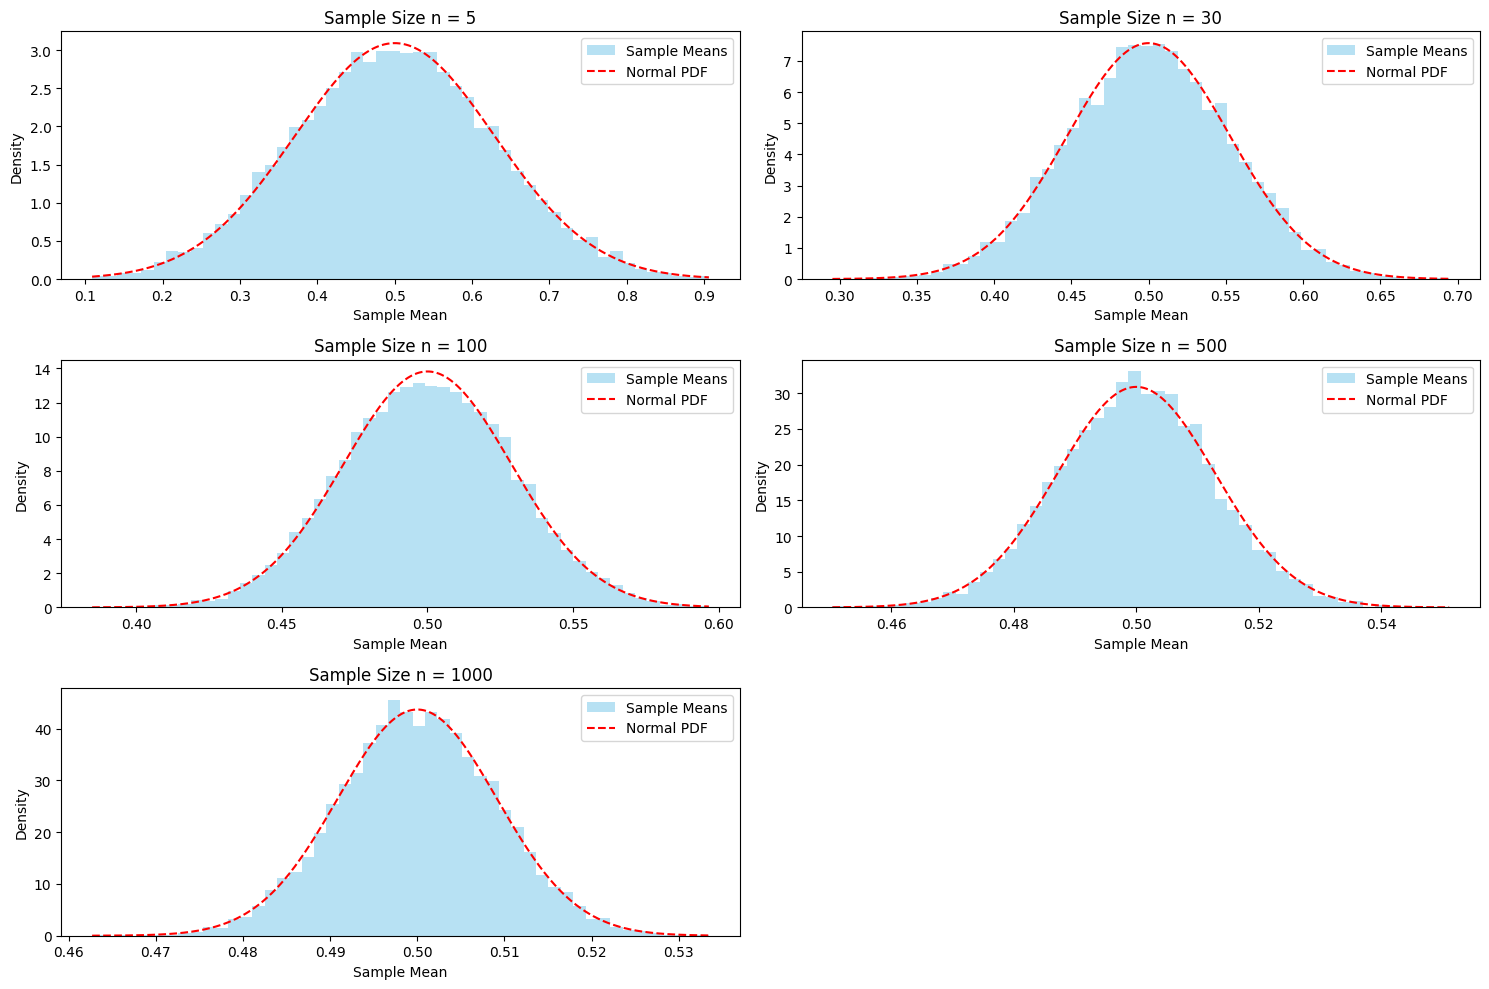

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define parameters
num_simulations = 10000
sample_sizes = [5, 30, 100, 500, 1000]
a, b = 0, 1  # Parameters for the uniform distribution U(a, b)

# Store sample means for each sample size
sample_means = []

for n in sample_sizes:
    # Generate samples from a uniform distribution
    samples = np.random.uniform(a, b, (num_simulations, n))

    # Compute sample means
    means = np.mean(samples, axis=1)
    sample_means.append(means)

    # Theoretical mean and variance
    theoretical_mean = (a + b) / 2
    theoretical_variance = (b - a)**2 / 12
    theoretical_std = np.sqrt(theoretical_variance / n)

    print(f"Sample Size n = {n}:")
    print(f"  Theoretical Mean: {theoretical_mean}")
    print(f"  Theoretical Std Dev of Mean: {theoretical_std:.4f}\n")

# Plotting the distribution of sample means for different sample sizes
plt.figure(figsize=(15, 10))

for idx, n in enumerate(sample_sizes):
    plt.subplot(3, 2, idx + 1)
    plt.hist(sample_means[idx], bins=50, density=True, alpha=0.6, color='skyblue', label='Sample Means')

    # Overlay the normal distribution
    theoretical_mean = (a + b) / 2
    theoretical_variance = (b - a)**2 / 12
    theoretical_std = np.sqrt(theoretical_variance / n)
    x = np.linspace(min(sample_means[idx]), max(sample_means[idx]), 1000)
    plt.plot(x, norm.pdf(x, theoretical_mean, theoretical_std), 'r--', label='Normal PDF')

    plt.title(f'Sample Size n = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

**Explanation:**

1.   *Generating Samples*:
  *   We generate `num_simulations` (10,000) samples for each sample size `n` from a uniform distribution $U(a,b)$.
  *   The sample mean is computed for each simulation.

2.   *Theoretical Mean and Standard Deviation*:
  *   For a uniform distribution $U(a,b)$, the theoretical mean is $μ=\frac{a+b}{2}$.
  *   The theoretical variance is $σ^2=\frac{(b−a)^2}{12}$.
  *   The standard deviation of the sample mean is $σ_\bar{X}=
\frac{σ}{\sqrt{n}}$.

3.   *Central Limit Theorem Visualization*:
  *   Histograms of the sample means are plotted for different sample sizes.
  *   Theoretical normal distribution curves are overlaid to visualize convergence as `n` increases.

**Interpretation:**

*   *Sample Size n = 5*:
  *   The distribution of sample means is still somewhat uniform but starting to show a central tendency.
  *   The overlayed normal distribution curve begins to approximate the histogram.
*   *Sample Size n = 30*:
  *   The distribution of sample means appears more bell-shaped.
  *   The normal distribution curve aligns closely with the histogram.
*   *Sample Size n = 100*:
  *   The distribution of sample means is well-approximated by a normal distribution.
  *   The histogram closely matches the normal curve.
*   *Sample Sizes n = 500 and n = 1000*:
  *   The distribution of sample means becomes increasingly normal.
  *   The histograms and normal curves overlap almost perfectly, illustrating the CLT.